In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
from logo import Logo
import logo_comparison
from logo_comparison import *

import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [262]:
# Loading the data
data_dfs = dict()

In [269]:
for i in np.arange(6, 7):

    applicant_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/applicant_{i}'
    applicant_logo_names = os.listdir(applicant_loc)
    applicant_logos = list()

    previous_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/previous_{i}'
    previous_logo_names = os.listdir(previous_loc)
    previous_logos = list()
    
    
    # Analyzing logo individually
    print(f"Initializing applicant logos (Test Set {i})")
    for applicant in tqdm(applicant_logo_names):
        if applicant != '.DS_Store':
            applicant_logos.append(Logo(applicant_loc + '/' + applicant))
            
    print(f"Initializing previous logos (Test Set {i})")
    for previous in tqdm(previous_logo_names):
        if previous != '.DS_Store':
            previous_logos.append(Logo(previous_loc + '/' + previous))
    
    
    # Comparing applicants and previous logos
    df = compare_logos(applicant_logos, previous_logos)
    
    data_dfs[f'df{i}'] = df

Initializing applicant logos (Test Set 6)


100%|████████████████████████████████████████████████████| 16/16 [00:27<00:00,  1.72s/it]


Initializing previous logos (Test Set 6)


100%|████████████████████████████████████████████████████| 16/16 [00:26<00:00,  1.68s/it]


Comparing logos


100%|████████████████████████████████████████████████████| 15/15 [04:03<00:00, 16.22s/it]


In [270]:
data_dfs['df6']

,Applicant Logo,Previous Logo,SSIM,Color Similarity Score,Shape Complexity Score,Template Matching,Text Similarity Score
0,bridgestone(rotated).png,t-mobile.png,0.325478,41.099236,0.874141,0.056666,0.0
1,bridgestone(rotated).png,batman.png,0.205106,33.646576,0.913518,0.068026,0.0
2,bridgestone(rotated).png,burgerking.png,0.242524,33.942704,0.679073,0.074275,0.0
3,bridgestone(rotated).png,doritos.png,0.305761,28.283435,0.713691,0.143685,0.0
4,bridgestone(rotated).png,tommyhilfiger.png,0.144734,20.448841,0.859818,0.041631,0.0
...,...,...,...,...,...,...,...
205,apple(rotated).png,aldi.png,0.003482,34.371224,0.629810,0.139893,0.0
206,apple(rotated).png,caterpillar.png,0.324995,30.821309,0.891849,0.078414,0.0
207,apple(rotated).png,chiquita.png,0.152973,41.590577,0.164431,0.142274,0.0
208,apple(rotated).png,bmw.png,0.335953,22.853526,0.690537,0.109477,0.0


In [ ]:
for logo 

In [ ]:
from scipy.spatial.distance import euclidean
euclidean([123, 123, 123])

In [275]:
df1 = list(data_dfs.values())[1]

prev_color = df1[['Previous Logo', 'Color Similarity Score']]
appl_color = df1[['Applicant Logo', 'Color Similarity Score']]
thing = (appl_color.groupby('Applicant Logo')
         .max().reset_index()
         .merge(prev_color)
         .drop_duplicates()
         .iloc[:50])

thing.sort_values('Color Similarity Score', ascending=False)


,Applicant Logo,Color Similarity Score,Previous Logo
10,microsoft(rotated).png,65.240508,t-mobile.png
15,tommyhilfiger(rotated).png,63.245055,chiquita.png
4,bridgestone(rotated).png,63.162917,microsoft.png
7,chiquita(rotated).png,63.077786,tommyhilfiger.png
0,aldi(rotated).png,62.236354,microsoft.png
6,caterpillar(rotated).png,61.991520,bmw.png
5,burgerking(rotated).png,61.464623,chiquita.png
2,batman(rotated).png,59.944106,microsoft.png
1,apple(rotated).png,59.829046,microsoft.png
3,bmw(rotated).png,59.279722,microsoft.png


In [238]:
dd_colors = applicant_logos[29].color_detect()

In [239]:
dd_colors

{(164, 116, 113): 0.1734857497543061,
 (214, 3, 111): 0.40454145761133814,
 (240, 110, 27): 0.4219727926343558}

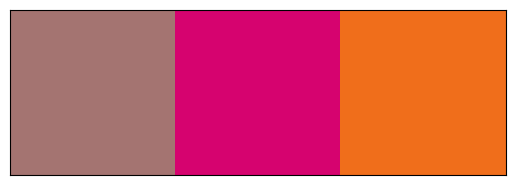

In [240]:
plt.imshow([list(dd_colors.keys())])
plt.xticks([]), plt.yticks([])
plt.show()

bridgestone(rotated).png


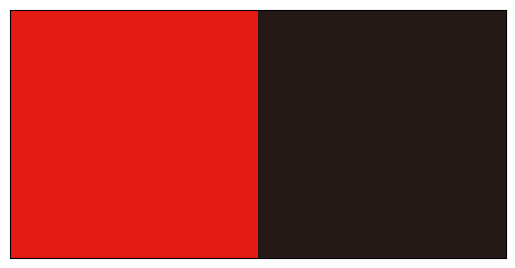

porsche(rotated).png


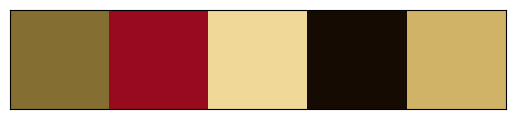

doritos(rotated).png


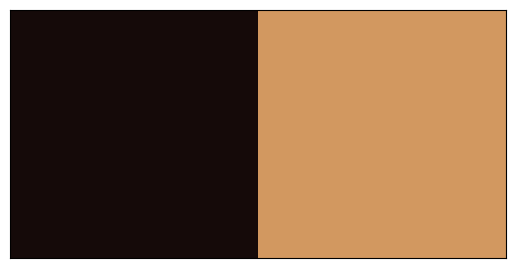

nbc(rotated).png


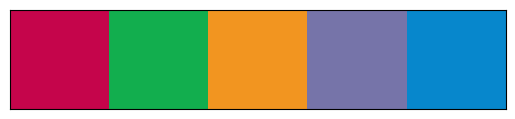

caterpillar(rotated).png


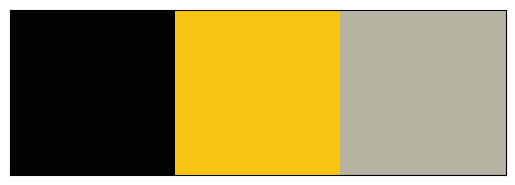

chiquita(rotated).png


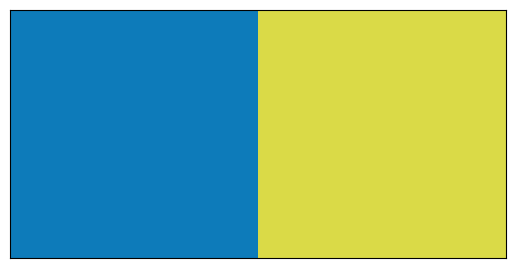

batman(rotated).png


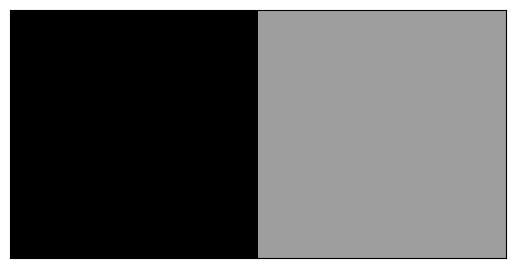

t-mobile(rotated).png


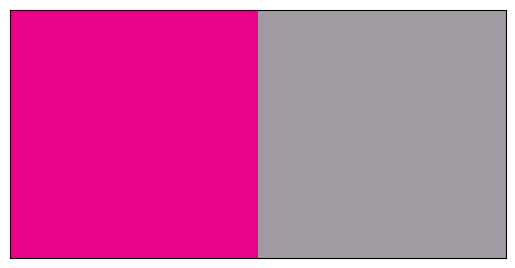

disney(rotated).png


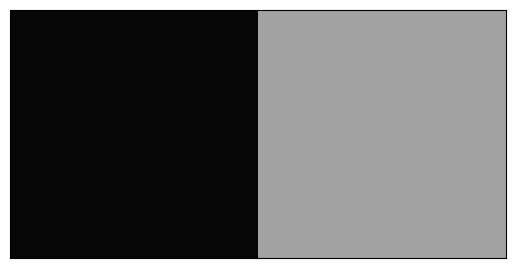

burgerking(rotated).png


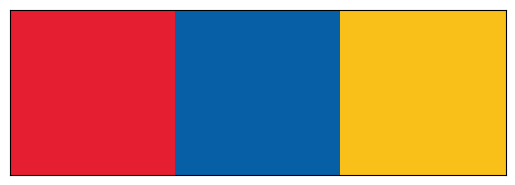

tommyhilfiger(rotated).png


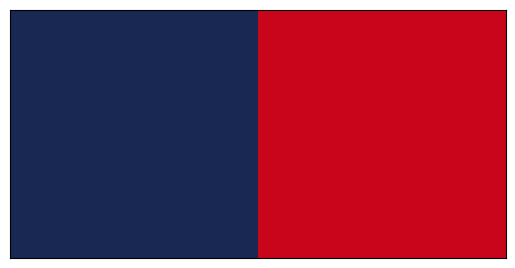

bmw(rotated).png


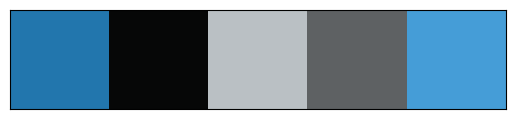

microsoft(rotated).png


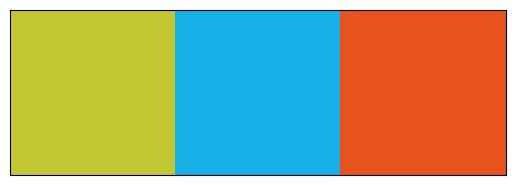

aldi(rotated).png


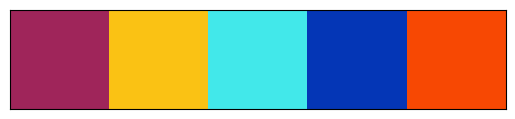

apple(rotated).png


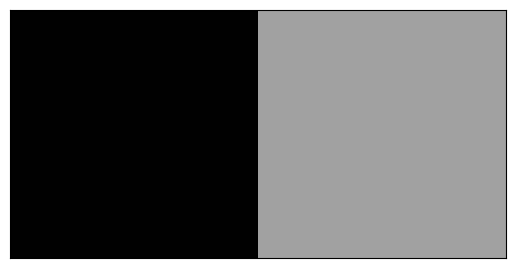

In [271]:
for logo in applicant_logos:
    print(logo.name)
    logo.show_colors()

t-mobile.png


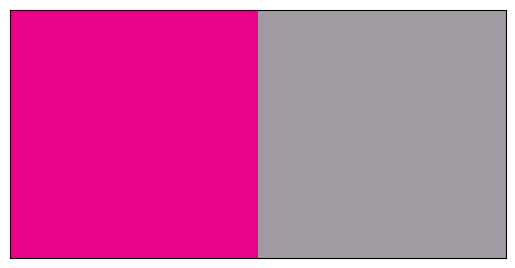

batman.png


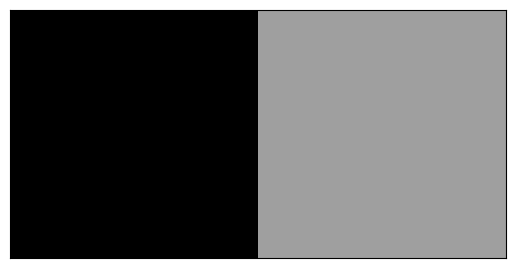

burgerking.png


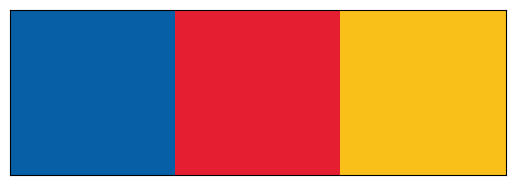

doritos.png


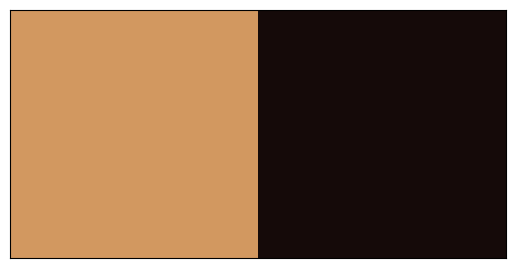

tommyhilfiger.png


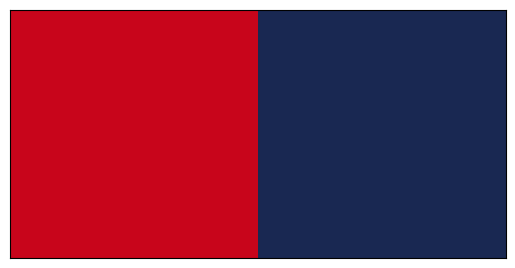

bridgestone.png


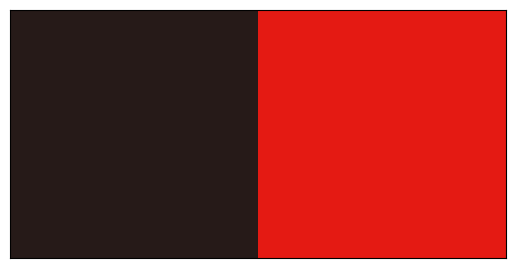

disney.png


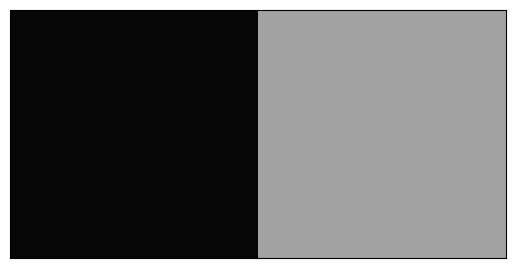

microsoft.png


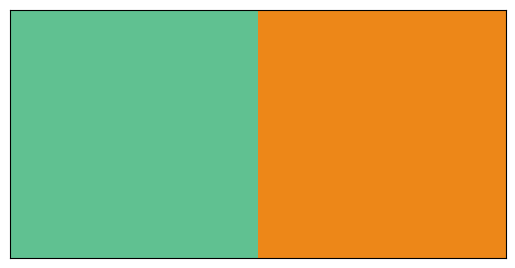

apple.png


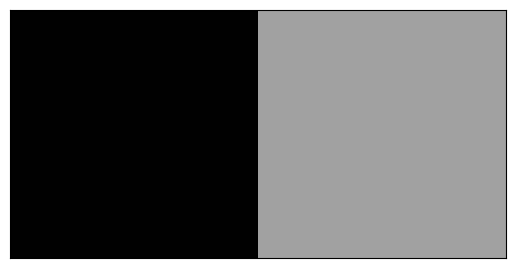

aldi.png


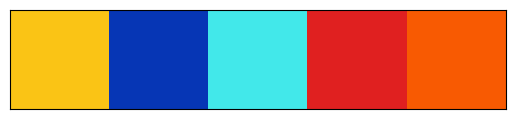

caterpillar.png


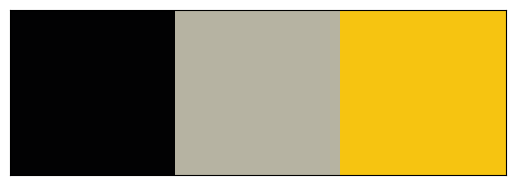

chiquita.png


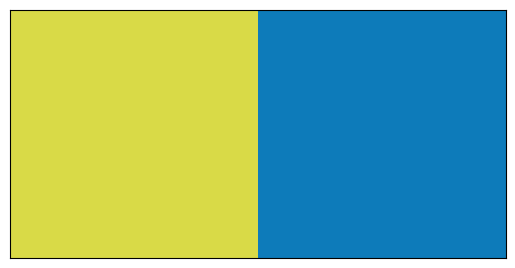

bmw.png


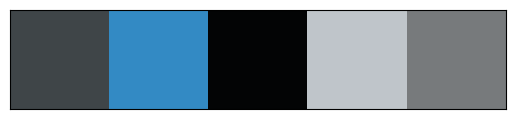

nbc.png


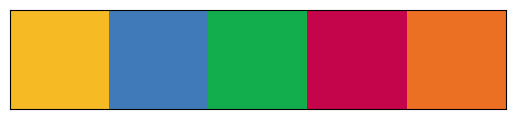

porsche.png


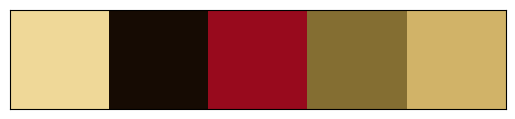

bridgestone(rotated).png


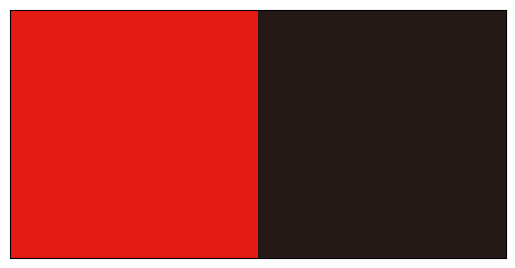

In [272]:
for logo in previous_logos:
    print(logo.name)
    logo.show_colors()

# Time Complexity Improvement

- 1-2 seconds to initialize each logo (1.5 on average)
- 1-2 seconds to compare two logos (1.5 on average)
- So runtime of whole program can be calculated using this formula (plug in number of applicants (a) and number of previous (p))

$$\large \text{number of minutes} \approx \frac {(a+p) + (a \cdot p)}{60}$$

## Template matching should be scaled! 
The first DataFrame shows how inaccurate template matching is when a single threshold is set for all pairs. However, when you look at the highest template matching score for each applicant logo, results are significantly better. 

### Top 16 Template Matches (3 actual matches)

In [85]:
df4 = data_dfs['df4']
df4[['Applicant Logo', 'Template Matching', 'Previous Logo']].sort_values('Template Matching', ascending = False).iloc[:16]

,Applicant Logo,Template Matching,Previous Logo
441,mastercard.png,0.566091,Mastercard (reversed).png
477,facebook.png,0.466919,Facebook (reversed).png
491,facebook.png,0.420871,nikon.png
415,espn.png,0.419725,CNN (reversed).png
472,facebook.png,0.414893,HomeDepot (reversed).png
418,espn.png,0.414081,Facebook (reversed).png
409,espn.png,0.414081,HolidayInn (reversed).png
413,espn.png,0.408475,HomeDepot (reversed).png
431,espn.png,0.405530,fedex.png
422,espn.png,0.404455,ESPN (reversed).png


### Highest Template Match for each of 16 applicants (7 actual matches)

In [84]:
prev_template = df4[['Previous Logo', 'Template Matching']]
appl_template = df4[['Applicant Logo', 'Template Matching']]
appl_template.groupby('Applicant Logo').max().reset_index().merge(prev_template)

,Applicant Logo,Template Matching,Previous Logo
0,BaskinRobbins.png,0.343831,CNN (reversed).png
1,cnn.png,0.252814,Mastercard (reversed).png
2,dhl.png,0.313572,DHL (reversed).png
3,dunkin.png,0.256506,Dunkin (reversed).png
4,espn.png,0.419725,CNN (reversed).png
5,facebook.png,0.466919,Facebook (reversed).png
6,fedex.png,0.213830,BaskinRobbins.png
7,ford.png,0.197845,Ford (reversed).png
8,holidayinn.png,0.396468,Facebook (reversed).png
9,homedepot.png,0.230129,HomeDepot (reversed).png


In [71]:
for logo in previous_logos:
    print(logo.name, logo.text)

Philips (reversed).png eqijiHa

HolidayInn (reversed).png 
DHL (reversed).png 
Fedex (reversed).png x3bo1

22x

Mastercard (reversed).png bips19s20m

HomeDepot (reversed).png 
Lacoste (reversed).png AIT2ODAI

CNN (reversed).png 
Dunkin (reversed).png 
Nikon (reversed).png noni

Facebook (reversed).png 
lyft(reversed).png 
WholeFoods (reversed).png FIGHW
20004

BaskinRobbins (reversed).png 
ESPN (reversed).png ioc:

Ford (reversed).png 
homedepot.png 
ford.png 
BaskinRobbins.png 
philips.png 
lacoste.png 
lacoste_text.png LACOSTE @=

wholefoods.png MARKET

fedex.png 
nikon.png Nikon

cnn.png 2

dhl.png 
holidayinn.png 
dunkin.png OUNKIN’

espn.png Eoril

mastercard.png 
facebook.png 
lyft.png 


In [69]:
applicant_logos[6].colors

{(157, 175, 166): 0.10245028409090909,
 (16, 81, 49): 0.3416193181818182,
 (251, 252, 252): 0.5559303977272727}

In [154]:
logoA = applicant_logos[5]
logoA

BaskinRobbins.png

In [168]:
test

[GiorgoArmani DunkinDonuts (fake).png,
 Visa Versace (fake).png,
 McDonalds (fake).png,
 ebay chloe (fake).png,
 Nike Dior (fake).png,
 McDonalds Stussy (fake).png,
 Nike(jedi).png,
 BaskinRobins DonnaKaran (fake).png,
 Lego(fake).png,
 Nike(fried).png,
 PizzaHut MarcJacobs (fake).png,
 TomFord Youtube (fake).png,
 Nike(woman).png,
 DHL YSL (fake).png,
 Ikea Miumiu (fake).png,
 BurgerKing CalvinKlein (fake).png,
 Pepsi Palace (fake).png,
 LG (fake).png,
 HomeDepot (fake).png,
 tokyo2020 (fake).png,
 Chanel Champion (fake).png,
 Puma Gucci (fake).png,
 Shell(fake).png,
 BaskinRobbins.png]

In [167]:
calculate_logo_shape_complexity_similarity(logoA, test)

,Logo 1,Logo 2,Similarity Score
9,BaskinRobbins.png,Nike(fried).png,1.000000e+00
0,BaskinRobbins.png,GiorgoArmani DunkinDonuts (fake).png,9.934217e-01
17,BaskinRobbins.png,LG (fake).png,9.292078e-01
12,BaskinRobbins.png,Nike(woman).png,8.893117e-01
7,BaskinRobbins.png,BaskinRobins DonnaKaran (fake).png,8.526124e-01
2,BaskinRobbins.png,McDonalds (fake).png,7.960148e-01
16,BaskinRobbins.png,Pepsi Palace (fake).png,7.301788e-01
1,BaskinRobbins.png,Visa Versace (fake).png,6.676095e-01
3,BaskinRobbins.png,ebay chloe (fake).png,6.599102e-01
4,BaskinRobbins.png,Nike Dior (fake).png,6.592395e-01
